# Computational Intelligence Homework 1 

In [1]:
import sys
!python -m pip install tabulate

In [1]:
from tabulate import tabulate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## fetching data

the problem is that the data in Open, Close, High, Low is not float, and string instead. Hence, we have to change the data type to float (assuming we count cents as well). But there is a minor problem which the data in those columns has ',' character, so in this cell I tried to remove them by iterating the dataframe in those columns. (the apply function was tried, But didn't work)

In [2]:
data = pd.read_csv('../BTC-USDT.csv')
print(tabulate(data, headers = 'keys', tablefmt = 'fancy_grid'))
N = len(data.index) # sample size
col_num = len(data.columns)
data.insert(0, 'x', data.index)
# data[['Open', 'High', 'Low', 'Close']] = 

# an iteration of the dataframe from open column to close, to remove the ',' character from the numbers in string type.
for i in range(0, N):
    for j in range(2, col_num+1):
        data.iloc[i, j] = data.iloc[i,j].replace(",","")
        

# change data type from string to float    
data[['Open', 'High', 'Low', 'Close']] = data[['Open', 'High', 'Low', 'Close']].astype(float)

# all vertical vectors
y_Low = np.matrix(data['Low'].to_numpy()).T
y_High = np.matrix(data['High'].to_numpy()).T
y_Open = np.matrix(data['Open'].to_numpy()).T
y_Close = np.matrix(data['Close'].to_numpy()).T
x = np.matrix(data['x'].to_numpy()).T
# add ones to x for the bias. it'll be a general structure.
x = np.hstack([x, np.ones((N,1), dtype=int)])

╒═════╤════════════╤════════╤════════╤════════╤═════════╕
│     │ Date       │ Open   │ High   │ Low    │ Close   │
╞═════╪════════════╪════════╪════════╪════════╪═════════╡
│   0 │ 10/4/2020  │ 10,580 │ 10,700 │ 10,536 │ 10,652  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   1 │ 10/5/2020  │ 10,652 │ 10,754 │ 10,635 │ 10,741  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   2 │ 10/6/2020  │ 10,740 │ 10,797 │ 10,544 │ 10,557  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   3 │ 10/7/2020  │ 10,557 │ 10,678 │ 10,546 │ 10,660  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   4 │ 10/8/2020  │ 10,662 │ 10,945 │ 10,558 │ 10,894  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   5 │ 10/9/2020  │ 10,894 │ 11,099 │ 10,848 │ 11,042  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   6 │ 10/10/2020 │ 11,041 │ 11,464 │ 11,029 │ 11,371  │
├─────┼────────────┼────────┼────────┼────────┼─────────┤
│   7 │ 10/11/

## Linear model for estimating Bitcoin fluctuation behavior

### direct solving method

direct solution is as follows:

$$
\begin{align*}
&\vec{\nabla}_w\mathcal{E} = \mathbf{X}\vec{w} - \vec{t} \\
&\vec{\nabla}_w\mathcal{E} = 0 \\
&\mathbf{X}\vec{w} - \vec{t} = 0 \\
&\mathbf{X}\vec{w} = \vec{t} \\
&\mathbf{X}^T\mathbf{X}\vec{w} = \mathbf{X}^T\;\vec{t} \\
&\vec{w} = \Big(\mathbf{X}^T\mathbf{X}\Big)^{-1}\mathbf{X}^T\;\vec{t} \\
\end{align*}
$$

In [3]:
w_Low_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Low))
w_High_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_High))
w_Close_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Close))
w_Open_dir = np.dot(np.dot(x.T, x)**-1, np.dot(x.T,y_Open))

### Linear regression

to get the regression line, we have to calculate the matrix multiplication of $ \mathbf{X}\,\vec{w} $. from that we get an array of all estimated y values (bitcoin prices in each day of index).

Text(0.5, 1.0, 'close price')

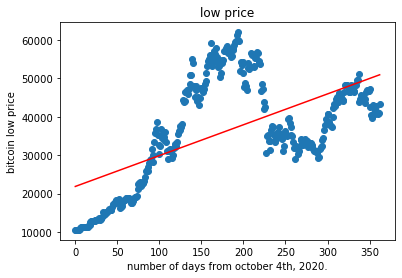

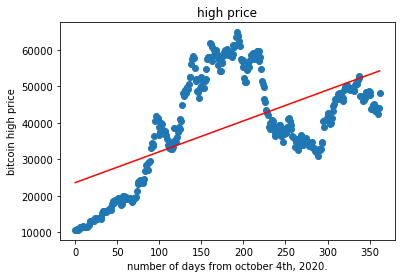

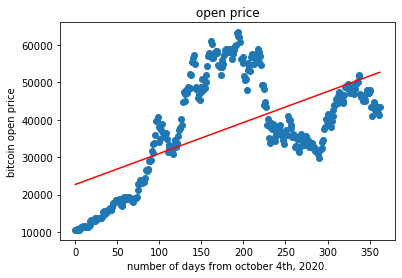

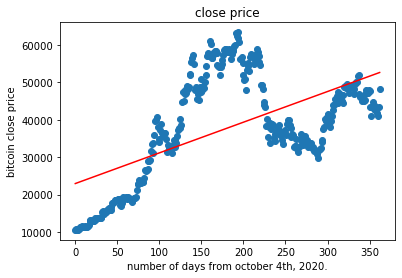

In [4]:
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Low))
estimate_Low = np.dot(x, w_Low_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Low), color='r')
plt.ylabel('bitcoin low price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('low price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_High))
estimate_High = np.dot(x, w_High_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_High), color='r')
plt.ylabel('bitcoin high price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('high price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Open))
estimate_Open = np.dot(x, w_Open_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Open), color='r')
plt.ylabel('bitcoin open price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('open price')

plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Close))
estimate_Close = np.dot(x, w_Close_dir)
plt.plot(np.array(x[:,0]), np.array(estimate_Close), color='r')
plt.ylabel('bitcoin close price')
plt.xlabel('number of days from october 4th, 2020.')
plt.title('close price')

### solving with gradient descent (an iterative approach)

[[   87.77683329]
 [20079.71119003]]
second cost function equals to:  [[-443.81990862]]


Text(0.5, 0, 'number of days from october 4th, 2020.')

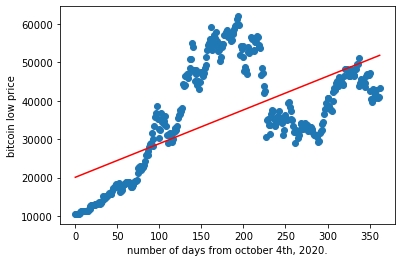

In [15]:
w_Low = np.matrix([0.0]*2).T      # D+1, D features and one bias.
w_Low1 = np.matrix([0.0]*2).T
w_High = np.matrix([0.0]*2).T
w_Open = np.matrix([0.0]*2).T 
w_Close = np.matrix([0.0]*2).T
learning_rate = [0.00001, 0.01]
No_iterations = 1000 # number of iterations

for itr in range(No_iterations):
    for j in range(w_Low1.shape[0]):
        cost_grad = 0
        for i in range(N):
            cost_grad += (1/N)*(w_Low1[0]*x[i,0] + w_Low1[1] - y_Low[i])*x[i,j]
        w_Low1[j] = w_Low1[j] - learning_rate[j] * cost_grad
print(w_Low1)
print('first cost function equals to: ',cost_grad)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Low))
estimate_Low1 = np.dot(x, w_Low1)
plt.plot(np.array(x[:,0]), np.array(estimate_Low1), color='r')
plt.ylabel('bitcoin low price')
plt.xlabel('number of days from october 4th, 2020.')

[[   80.36684268]
 [21860.28038291]]
second cost function equals to:  [[-0.02102596]]


Text(0.5, 0, 'number of days from october 4th, 2020.')

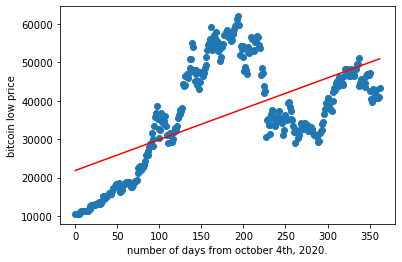

In [21]:
for itr in range(No_iterations):
    for j in range(w_Low.shape[0]):
        cost_function_grad = (1/N)*np.dot((np.dot(x, w_Low) - y_Low).T, x[:,j])
        w_Low[j] = w_Low[j] - learning_rate[j] * cost_function_grad
#         print('first cost function equals to: ',cost_function_grad)
print(w_Low)
print('second cost function equals to: ',cost_function_grad)            
plt.figure()
plt.scatter(np.array(x[:,0]), np.array(y_Low))
estimate_Low2 = np.dot(x, w_Low)
plt.plot(np.array(x[:,0]), np.array(estimate_Low2), color='r')
plt.ylabel('bitcoin low price')
plt.xlabel('number of days from october 4th, 2020.')

In [ ]:

# increment number of parameters per learning
# evaluate 